# Pandas: processing data
Before you begin, go over the [demo code of basic statistics and visualization](https://github.com/mgbarsky/cs_1503_basic_stats_demo), presented in class.

**TURNING IT IN:** Submit this Jupyter notebook on Canvas by the deadline. Don't submit any other files.

## So, what is pandas anyway?

`pandas` is a Python library for doing data analysis. 
pandas is a foundational part of using Python for machine Learning. Most if not all things that pandas does can be done with plain-jane Python, but, most of the time, pandas does them *faster* and *easier*. It's built on top of another extremely powerful third-party Python library called `numpy`.

Pandas has a powerful set of *structures* and *functions* that make working with large datasets simple. Once you learn these structures and functions, it becomes extremely easy to answer any question you want to ask with a given data set. 

pandas also interacts nicely with a bunch of other Python libraries and programs:

* Jupyter notebooks, that allow you to construct computational narratives with code, data, and text. Displaying dataframes (one of pandas' data structures) as an inline HTML table is one of the major interactions between Jupyter and pandas.
* [Matplotlib](https://matplotlib.org/) is a powerful graphing library for Python. Generating plots from dataframes is simple with matplotlib and pandas.
* pandas also integrates with scientific computing/machine learning Python libraries, like [SciKit](http://scikit-learn.org/stable/) and [SciPy](https://www.scipy.org/).

__Keep running all the code cells as you read__.

## Sample dataset
We use the original Titanic dataset, that describes the survival status of individual passengers on the Titanic.

The dataset is summarized in file `titanic.csv`. The `.csv` extension means that each tuple is on a separate line, and the values inside each tuple are comma-separated.  

In [1]:
file_name = "titanic.csv"

In [2]:
import pandas as pd

# this creates a pandas.DataFrame
data = pd.read_csv(file_name, index_col='PassengerId')

In [26]:
# Selecting rows
head = data[:10]

head  # if you leave an expression at the end of a cell, jupyter will "display" it automatically

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
163,0,3,"Bengtsson, Mr. John Viktor",male,26.000000,0,0,347068,7.7750,NaN,S
164,0,3,"Calic, Mr. Jovo",male,17.000000,0,0,315093,8.6625,NaN,S
165,0,3,"Panula, Master. Eino Viljami",male,1.000000,4,1,3101295,39.6875,NaN,S


#### Some dataset attributes
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender (in those ol' times when just 2 of them were allowed)
* Age - age in years, if available
* Sibsp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
     * C = Cherbourg; Q = Queenstown; S = Southampton

## Pandas basics

In [4]:
# table dimensions
print("len(data) = ", len(data))
print("data.shape = ", data.shape)

len(data) =  891
data.shape =  (891, 11)


In [5]:
# select a single row - row 4
print(data.loc[4])

Survived                                               1
Pclass                                                 1
Name        Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                               female
Age                                                 35.0
SibSp                                                  1
Parch                                                  0
Ticket                                            113803
Fare                                                53.1
Cabin                                               C123
Embarked                                               S
Name: 4, dtype: object


In [6]:
# select a single column.
ages = data["Age"] # alternatively: data.Age
print(ages[:10])  # prints first 10 rows of a single-column dataset

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64


In [7]:
# select several columns and rows at once
# alternatively: data[["Fare","Pclass"]].loc[5:10]
data.loc[5:10, ("Fare", "Pclass")]

,Fare,Pclass
PassengerId,,
5,8.0500,3
6,8.4583,3
7,51.8625,1
8,21.0750,3
9,11.1333,3
10,30.0708,2


Pandas also have some basic data analysis tools. For one, you can quickly display statistical aggregates for each column using `.describe()`

In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# filters
print("Only male children")
mc = data[(data['Age'] < 18) & (data['Sex'] == 'male')]
mc.head()

Only male children


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S


```
```
<div style="background-color:yellow;">
    <h3>Task 1. Your turn:</h3>    
</div>



In [10]:
# select passengers number 13 and 666 - did they survive?

print("Passenger 13 survival: " + str(data.loc[13]["Survived"]))
print("Passenger 166 survival: " + str(data.loc[166]["Survived"]))

Passenger 13 survival: 0
Passenger 166 survival: 1


In [11]:
# compute the overall survival rate (what fraction of passengers survived the shipwreck)

survived = data[(data["Survived"] == 1)]
print("Survival rate: " + str(len(survived)/len(data)))

Survival rate: 0.3838383838383838


## Missing values
Some columns contain __NaN__ values - this means that there is no data there. For example, passenger `#6` has unknown *Age*, some others have unknown *Fare*. To simplify the data analysis, we can replace missing values by using pandas `fillna` function.

_Note: we do this only for the purpose of this tutorial. In general, you think twice before you modify data like this._

In [12]:
# Age before replacement
data.loc[6]

Survived                   0
Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                      NaN
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 6, dtype: object

In [13]:
data['Age'] = data['Age'].fillna(value=data['Age'].mean())


In [14]:
# Age after replacement - meaning?
data.loc[6]

Survived                   0
Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                29.699118
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 6, dtype: object

```
```
<div style="background-color:yellow;">
    <h3>Task 2. Your turn:</h3>    
</div>


In [15]:
# Replace the missing values of the "Fare" column with the median of the fair value:

data['Fare'] = data['Fare'].fillna(value=data['Fare'].median())

## Basic statistics

We can compute all the basic statistics on the dataset. For example, we can compute a max of the Fare column like this:

In [16]:
# computes a max ticket price and find the passenger who paid the most
m = data["Fare"].max()
m

512.3292

Let's locate a person (or persons) who paid this max price:

In [17]:
data.iloc[data['Fare'].idxmax()] 

Survived                              1
Pclass                                2
Name        Parrish, Mrs. (Lutie Davis)
Sex                              female
Age                                50.0
SibSp                                 0
Parch                                 1
Ticket                           230433
Fare                               26.0
Cabin                               NaN
Embarked                              S
Name: 260, dtype: object

The `iloc()` function provides a way to access specific rows and columns in a pandas DataFrame using integer-based indexing. So, `idxmax()` first returned the index row of the max Fare. and the we locate and retrieve data based on its position within the DataFrame.

```
```
<div style="background-color:yellow;">
    <h3>Task 3. Your turn:</h3>    
</div>


In [24]:
# your code: compute mean passenger age and the data about the oldest woman on the ship

print("Mean passenger age: " + str(data["Age"].mean()))

womenData = data[(data["Sex"] == "female")]
data.iloc[womenData["Age"].idxmax() - 1]

Mean passenger age: 29.699117647058763


Survived                                    1
Pclass                                      1
Name        Andrews, Miss. Kornelia Theodosia
Sex                                    female
Age                                      63.0
SibSp                                       1
Parch                                       0
Ticket                                  13502
Fare                                  77.9583
Cabin                                      D7
Embarked                                    S
Name: 276, dtype: object

In [28]:
# who on average paid more for their ticket, men or women?

mean_fare_men = data[(data["Sex"] == "male")]["Fare"].mean()
mean_fare_women = data[(data["Sex"] == "female")]["Fare"].mean()

print(mean_fare_men, mean_fare_women)

25.523893414211418 44.47981783439487


In [31]:
# who is more likely to survive: a child (<18 yo) or an adult?

child_survival_rate = len(data[(data["Age"] < 18) & data["Survived"] == 1])/len(data)
adult_survival_rate = len(data[(data["Age"] >= 18) & data["Survived"] == 1])/len(data)

print(child_survival_rate, adult_survival_rate)

0.06846240179573512 0.3153759820426487


More about Pandas:
[kaggle microlesson](https://www.kaggle.com/learn/pandas)

## Plots and matplotlib

Using python to visualize the data is covered by yet another library: `matplotlib`.

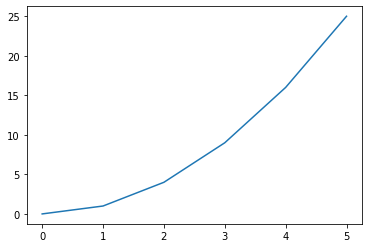

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
# ^-- this "magic" tells all future matplotlib plots to be drawn inside notebook and not in a separate window.

# line plot
plt.plot([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25])

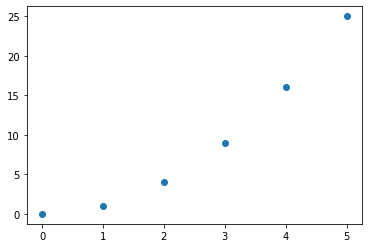

In [33]:
# scatter-plot
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25])

plt.show()  # show the first plot and begin drawing next one

Text(0, 0.5, '# of data scientists per 100,000')

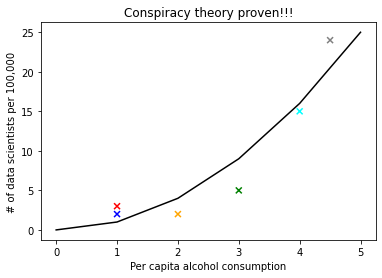

In [34]:
# draw a scatter plot with custom markers and colors
plt.scatter([1, 1, 2, 3, 4, 4.5], [3, 2, 2, 5, 15, 24],
            c=["red", "blue", "orange", "green", "cyan", "gray"], marker="x")

# without .show(), several plots will be drawn on top of one another
plt.plot([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25], c="black")

# adding more sugar
plt.title("Conspiracy theory proven!!!")
plt.xlabel("Per capita alcohol consumption")
plt.ylabel("# of data scientists per 100,000")

# fun with correlations: http://bit.ly/1FcNnWF

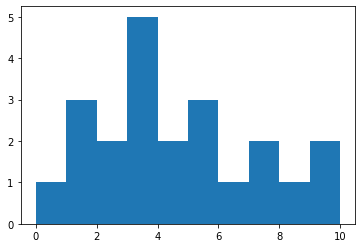

(array([4., 7., 5., 3., 3.]),
 array([ 0.,  2.,  4.,  6.,  8., 10.]),
 <BarContainer object of 5 artists>)

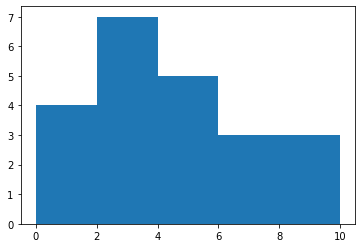

In [35]:
# histogram - showing data density
plt.hist([0, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 6, 7, 7, 8, 9, 10])
plt.show()

plt.hist([0, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4,
          4, 5, 5, 5, 6, 7, 7, 8, 9, 10], bins=5)

```
```
<div style="background-color:yellow;">
    <h3>Task 4. Your turn:</h3>    
</div>


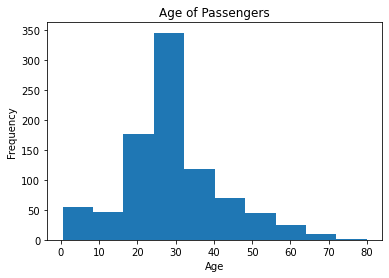

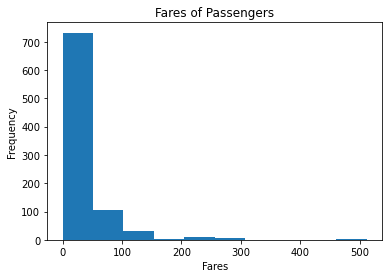

In [39]:
# plot a histogram of age and a histogram of ticket fares on separate plots

plt.hist(data["Age"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age of Passengers")
plt.show()

plt.hist(data["Fare"])
plt.xlabel("Fares")
plt.ylabel("Frequency")
plt.title("Fares of Passengers")
plt.show()

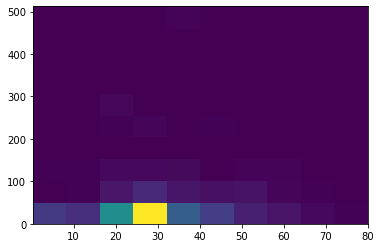

In [49]:
# Can you do that? find out if there is a way to draw a 2D histogram of age vs fare.

plt.hist2d(data["Age"], data["Fare"])
plt.show()

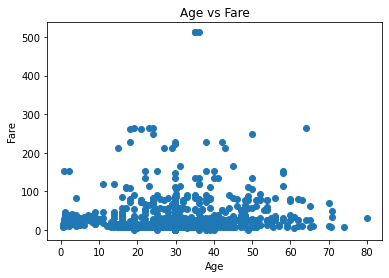

In [51]:
# make a scatter plot of passenger age vs ticket fare

plt.scatter(data['Age'], data['Fare'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare")
plt.show()

No handles with labels found to put in legend.


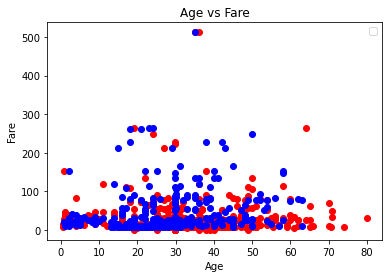

In [58]:
# Can you do that? add separate colors for men and women

male_data = data[(data["Sex"] == "male")]
plt.scatter(male_data['Age'], male_data["Fare"], color = 'red')
female_data = data[(data["Sex"] == "female")]
plt.scatter(female_data['Age'], female_data["Fare"], color = 'blue')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare")
plt.show()

More about Data visualization:
[kaggle microlesson](https://www.kaggle.com/learn/data-visualization)

### This is the end of the pandas-primer recitation. 

Copyright &copy; 2020 Marina Barsky.